In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import math
import sys
np.set_printoptions(threshold=20)

In [2]:
# Make 2xn X matrix and an n vector y - Generating the dataset
X, y = make_blobs(centers=3, n_samples=500, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(f'x train: \n{x_train}')
print(f'\ny train: \n{y_train}')
print(f'\nx test: \n{x_test}')
print(f'\ny test: \n{y_test}')

x train: 
[[  0.2450988    5.51754657]
 [ -0.46064203   4.59164629]
 [-11.09486686  -3.1147138 ]
 ...
 [ -9.03117325  -3.2402995 ]
 [-11.89652456  -5.07045924]
 [ -2.84187803   3.74073535]]

y train: 
[0 0 1 ... 1 1 0]

x test: 
[[ -9.20932623  -8.52279053]
 [-10.27355857  -2.72439296]
 [-10.77557133  -2.83750744]
 ...
 [ -9.54642849  -5.63740853]
 [ -1.55333718   2.88080955]
 [-10.44645054  -4.62579659]]

y test: 
[2 1 1 ... 1 0 1]


In [3]:
# Initialize the centroids from random data points
k=3 
maxiter=50
centroids = x_train[np.random.randint(x_train.shape[0], size=k)]
print(f'Centroids: \n{centroids}')

Centroids: 
[[-7.1870362  -8.83407968]
 [-1.3748118   4.66895731]
 [-6.13938097 -8.61021596]]


Training

In [4]:
# Initialize vectors to store the assigned classes of each data point
# and the calculated distances from each centroid
classes = np.zeros(x_train.shape[0], dtype=np.float64)
distances = np.zeros([x_train.shape[0], k], dtype=np.float64)
print(f'Classes: \n{classes}')
print(f'\nDistances: \n{distances}')

Classes: 
[0. 0. 0. ... 0. 0. 0.]

Distances: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [5]:
for i in range (maxiter):
    # Assign all points to the nearest centroids
    for i,c in enumerate(centroids):
        distancess = []
        for j in range(len(x_train)):
            distance = 0 
            # Calculating distance for each centroids
            for l in range(len(x_train[j])):
                distance += math.pow((c[l] - x_train[j][l]), 2)
            # Storing all the calculated distance 
            distancess.append(math.sqrt(distance))
        distances[:, i] = distancess
    # Determine class membership of each point using np.argmin which
    # return indices of minimum values across an axis
    # which are the minimum distances to centroid
    y_train_hat = np.argmin(distances, axis=1)
    # Update centroid location using newly assigned data point classes
    for c in range(k):
        centroids[c] = np.mean(x_train[y_train_hat == c], 0)
print(f'Distances: \n{distances}')
print(f'\nClasses: \n{y_train_hat}')
print(f'\nEach Final Classes:')
print(x_train[y_train_hat == 0].shape)
print(x_train[y_train_hat == 1].shape)
print(x_train[y_train_hat == 2].shape)

Distances: 
[[13.95428871  2.07195846 15.57999955]
 [12.81111556  1.08719225 14.43312709]
 [ 1.25641367 12.19680301  6.56778272]
 ...
 [ 1.2247088  10.74741132  5.41257642]
 [ 2.17641585 14.07845505  5.83023746]
 [10.50197589  1.49007889 12.7119356 ]]

Classes: 
[1 1 0 ... 0 0 1]

Each Final Classes:
(119, 2)
(118, 2)
(113, 2)


Testing

In [6]:
# Repeating the same procedure for training data
classes = np.zeros(x_test.shape[0], dtype=np.float64)
distances = np.zeros([x_test.shape[0], k], dtype=np.float64)
print(f'Classes: \n{classes}')
print(f'\nDistances: \n{distances}')

Classes: 
[0. 0. 0. ... 0. 0. 0.]

Distances: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [7]:
for i,c in enumerate(centroids):
    distancess = []
    for j in range(len(x_test)):
        distance = 0 
        for l in range(len(x_test[j])):
            distance += math.pow((c[l] - x_test[j][l]), 2)
        distancess.append(math.sqrt(distance))
    distances[:, i] = distancess
y_test_hat = np.argmin(distances, axis=1)
print(f'Distances: \n{distances}')
print(f'\nClasses: \n{y_test_hat}')
print(f'\nEach Final Classes:')
print(x_test[y_test_hat == 1].shape)
print(x_test[y_test_hat == 2].shape)
print(x_test[y_test_hat == 3].shape)

Distances: 
[[ 4.74135451 15.08433415  2.20496332]
 [ 1.15413089 11.31267224  6.42565072]
 [ 1.23606021 11.77439116  6.60056903]
 ...
 [ 1.85441698 12.89134808  3.64561436]
 [10.87573765  1.58599833 12.4141364 ]
 [ 0.84368998 12.72745229  4.99890315]]

Classes: 
[2 0 0 ... 0 1 0]

Each Final Classes:
(49, 2)
(53, 2)
(0, 2)


In [114]:
# Repeating the testing procedure but for x_train
k = 3
classes = np.zeros(x_train.shape[0], dtype=np.float64)
distances = np.zeros([x_train.shape[0], k], dtype=np.float64)
print(f'Classes: \n{classes}')
print(f'\nDistances: \n{distances}')
for i,c in enumerate(centroids):
    distancess = []
    for j in range(len(x_train)):
        distance = 0 
        for l in range(len(x_train[j])):
            distance += math.pow((c[l] - x_train[j][l]), 2)
        distancess.append(math.sqrt(distance))
    distances[:, i] = distancess
y_train_hat = np.argmin(distances, axis=1)
print(f'Distances: \n{distances}')
print(f'\nClasses: \n{y_test_hat}')
print(f'\nEach Final Classes:')
print(x_train[y_train_hat == 1].shape)
print(x_train[y_train_hat == 2].shape)
print(x_train[y_train_hat == 3].shape)

Classes: 
[0. 0. 0. ... 0. 0. 0.]

Distances: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Distances: 
[[13.95428871  2.07195846 15.57999955]
 [12.81111556  1.08719225 14.43312709]
 [ 1.25641367 12.19680301  6.56778272]
 ...
 [ 1.2247088  10.74741132  5.41257642]
 [ 2.17641585 14.07845505  5.83023746]
 [10.50197589  1.49007889 12.7119356 ]]

Classes: 
[2 0 0 ... 0 1 0]

Each Final Classes:
(118, 2)
(113, 2)
(0, 2)


In [9]:
# Making dictionary and assign each class indices to its class
predicted_classes = y_train_hat
data_membership = {}
for i in range(len(predicted_classes)):
    p_class = predicted_classes[i]
    if p_class in data_membership:
        data_membership[p_class].append(i)
    else:
        data_membership[p_class]=[i]
print(f'Data Membership: \n{data_membership}')

Data Membership: 
{1: [0, 1, 3, 5, 6, 9, 11, 15, 16, 19, 23, 24, 27, 28, 39, 42, 43, 46, 48, 49, 51, 52, 54, 60, 64, 71, 72, 74, 77, 79, 85, 86, 95, 96, 98, 102, 103, 114, 115, 125, 126, 127, 128, 129, 132, 136, 138, 140, 141, 142, 144, 151, 154, 156, 157, 158, 161, 165, 167, 169, 176, 179, 180, 184, 187, 193, 196, 197, 199, 205, 212, 213, 218, 220, 221, 223, 225, 226, 227, 228, 231, 233, 234, 235, 240, 244, 245, 248, 255, 258, 260, 262, 264, 265, 273, 278, 285, 288, 298, 301, 302, 303, 307, 312, 313, 317, 318, 325, 328, 330, 331, 332, 333, 335, 336, 337, 344, 349], 0: [2, 10, 12, 13, 14, 18, 20, 21, 26, 33, 35, 37, 38, 40, 41, 44, 47, 55, 63, 69, 73, 80, 82, 83, 84, 87, 90, 94, 97, 101, 104, 105, 107, 108, 110, 111, 112, 113, 118, 120, 121, 123, 130, 131, 133, 134, 137, 147, 148, 149, 160, 164, 166, 168, 174, 178, 182, 183, 185, 186, 189, 192, 194, 200, 201, 206, 208, 209, 210, 215, 216, 219, 222, 224, 229, 230, 232, 236, 237, 241, 243, 246, 254, 256, 267, 269, 270, 271, 272, 274, 275

In [133]:
# Computing minimum distance between centroids
min_d = sys.float_info.max
for i in range(len(centroids)-1):
    for j in range(i+1, 3):
        distance = 0 
        for l in range(len(centroids[j])):
            distance += math.pow((centroids[i][l] - centroids[j][l]), 2)
        d = math.sqrt(distance)
        if d < min_d:
            min_d = d
min_d_centroids = min_d
print(f'Minimal distance between centroids: \n{min_d}')
# Computing maximum distance between data and its centroids
max_d = sys.float_info.min
for key,values in data_membership.items():
    for v in values:
        distance = 0 
        for l in range(2):
            distance += math.pow((centroids[key][l] - x_train[v][l]), 2)
        d = math.sqrt(distance)
        if d > max_d:
            max_d = d
max_d_within_centroids = max_d
print(f'\nMaximum distance between data and its centroids: \n{max_d}')
# Computing dunn index with the formula
di = min_d_centroids/max_d_within_centroids
print(f'\nDunn Index: \n{di}')

Minimal distance between centroids: 
5.364641799393381

Maximum distance between data and its centroids: 
4.167166256560769

Dunn Index: 
1.287359675402274


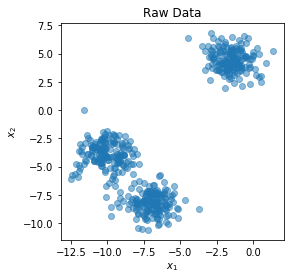

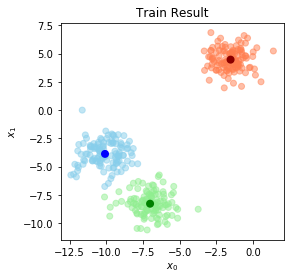

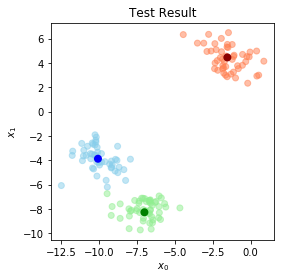

In [150]:
# Plotting the result
# Raw data
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], alpha=0.5)
ax.set_title('Raw Data')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# Training result
group_colors = ['skyblue', 'coral', 'lightgreen']
# Assigning colors to each classes 
colors = [group_colors[j] for j in y_train_hat]
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x_train[:, 0], x_train[:, 1], color=colors, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], color=['blue', 'darkred', 'green'], marker='o', lw=2)
ax.set_title('Train Result')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
# Test result
group_colors = ['skyblue', 'coral', 'lightgreen']
# Assigning colors to each classes 
colors = [group_colors[j] for j in y_test_hat]
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x_test[:, 0], x_test[:, 1], color=colors, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], color=['blue', 'darkred', 'green'], marker='o', lw=2)
ax.set_title('Test Result')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
plt.show()

In [156]:
type(x_train[:, 1])

numpy.ndarray